# Chapter 4: Deep Learning


Part 1  - Data preprocessing
------------


The objective of this first part is to learn about simple data curation practices. Data curation (for machine learning) consists basically in analyse, label, and separate in classes your input data.  In section two, you used pre-curated and separated data from the INRIA's person data set. Your first task is to create your training/testing sets by hand and analyse how well "balance" they are. 

**Objectives** 
In the following sections, you will use this part to "feed" both, a classic _Swallow_ (not-Deep) classificator using handcrafted features and a Deep (kind of Deep) neural network. Your task will consist in analyse the accuracy of the aforementioned classification based on the amount of data available; from few hundred of samples to the full data-set.

In this section we will provide the general steps and, as in the previous section, you will be asked to search in the function parameters and syntaxis in users documentation.


## Dataset 

In this last section of the course we will use the the [notMNIST](http://yaroslavvb.blogspot.com/2011/09/notmnist-dataset.html) dataset. This dataset is designed to look like the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset, but, more close to _real data_ scenarios — it's not trivial, and the data is a lot less 'clean' than MNIST.


### Libraries: 

Be sure that you can import all the libraries below; for the next part you will make use of the tensorflow library to implement the used neural network. Be sure to be able to import it as: 

`` import tensorflow as tf``

following the documentation page 

https://www.tensorflow.org/install/

We will use only CPU's based training. 



In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.dpi'] = 600

import cv2 as cv
import numpy as np
import os
import math
import tarfile
from utils import *
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from six.moves.urllib.request import urlretrieve
import glob
import pickle
import pandas as pd

### Download the data. 

As in section 2, you need to download the data and set the input directory. Be sure to have at about ~2 Gb of free space. If the function is not able to download the data, try on the MNIST site. 



In [2]:
# Download the Data
# The following functions will download the data for you and uncompress it

# WARNING:  These varaibles set the input/output paths for ALL the bellow functions.
url = 'http://commondatastorage.googleapis.com/books1000/'
last_percent_reported = None
data_root = os.path.join('..', 'data')


def maybe_download(filename, expected_bytes, force=False):
  """
  Downloads a file if not present, and make sure it's the right size!.
  If there's a file with the same name, the function will not try to 
  download the dataset again!
  """

  dest_filename = os.path.join(data_root, filename)
    
  if force or not os.path.exists(dest_filename):
    print('Attempting to download:', filename, 'This may take a while. Please wait.') 
    filename, _ = urlretrieve(url + filename, dest_filename)
    print('\nDownload Complete!')
  statinfo = os.stat(dest_filename)
  if statinfo.st_size == expected_bytes:
    print('Found and verified', dest_filename)
  else:
    raise Exception(
      'The file ' + dest_filename + 'already exist but seems corrupted. Delete it or download it from the browser!')
  return dest_filename


def try_to_extract(filename, force=False):
  """
  Uncompress the data set for you
  """
  root = os.path.splitext(os.path.splitext(filename)[0])[0]  # remove .tar.gz

  if os.path.isdir(root) and not force:
    # You may override by setting force=True.
    print('%s dataset (seems to be) already present.\nSkipping extraction of %s.' % (root, filename))
  else:
    print('Extracting data for %s. This may take a while. Please wait.' % root)
    tar = tarfile.open(filename)
    tar.extractall(data_root)
    tar.close()
    
  data_folders = [os.path.join(root, d) for d in sorted(os.listdir(root)) if os.path.isdir(os.path.join(root, d))]
  print("All setup.")
  return data_folders


In [3]:
# Downloads if needed.
large_filename = maybe_download('notMNIST_large.tar.gz', 247336696)
small_filename  = maybe_download('notMNIST_small.tar.gz', 8458043)

Found and verified ../data/notMNIST_large.tar.gz
Found and verified ../data/notMNIST_small.tar.gz


In [4]:
# Extracts if able.
large_folders = try_to_extract(large_filename)
small_folders = try_to_extract(small_filename)

../data/notMNIST_large dataset (seems to be) already present.
Skipping extraction of ../data/notMNIST_large.tar.gz.
All setup.
../data/notMNIST_small dataset (seems to be) already present.
Skipping extraction of ../data/notMNIST_small.tar.gz.
All setup.


In [5]:
large_folders

['../data/notMNIST_large/A',
 '../data/notMNIST_large/B',
 '../data/notMNIST_large/C',
 '../data/notMNIST_large/D',
 '../data/notMNIST_large/E',
 '../data/notMNIST_large/F',
 '../data/notMNIST_large/G',
 '../data/notMNIST_large/H',
 '../data/notMNIST_large/I',
 '../data/notMNIST_large/J']

---
Problem 1
---------

When working with data, always check your data. 

Create a description of your input data. Describe in a table or list (one for each sample size): 

* Number of classes (characters)
* Number of samples per class
* General information on the image size and number of channels.

Visualize one sample per class bellow for a chosen size (large or small). 

---


,Sample Size,Number of classes,Number of samples per class,Images size,Number of channels
0,large,24,52912,28X28,3
1,large,24,52912,28X28,3
2,large,24,52912,28X28,3
3,large,24,52912,28X28,3
4,large,24,52912,28X28,3
5,large,24,52912,28X28,3
6,large,24,52912,28X28,3
7,large,24,52912,28X28,3
8,large,24,52912,28X28,3
9,large,24,52911,28X28,3


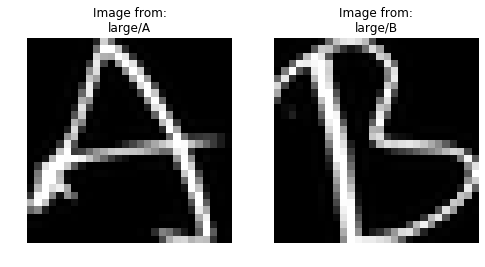

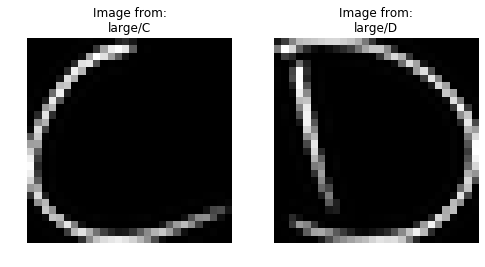

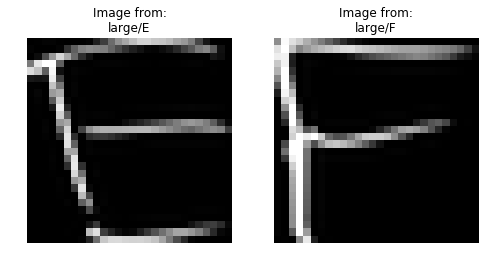

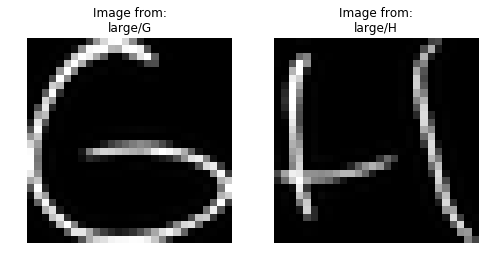

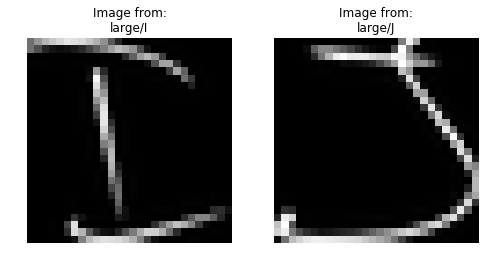

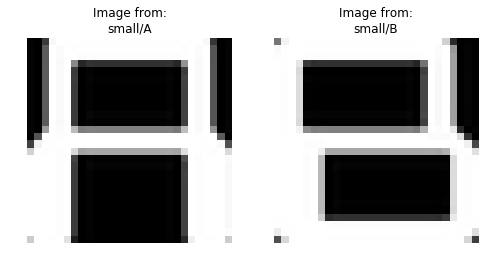

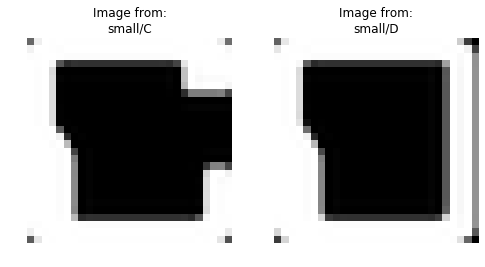

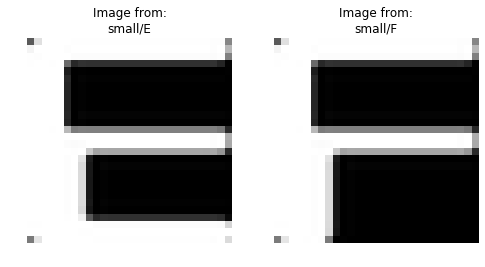

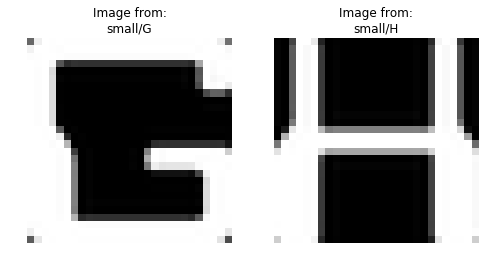

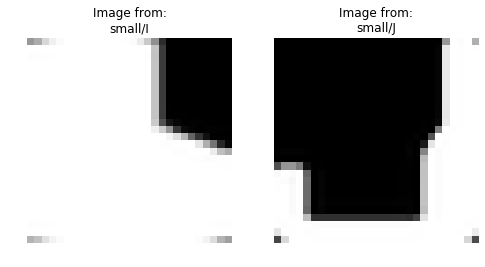

In [6]:
d = {'Sample Size': [], 'Number of classes': [], 'Number of samples per class': [], 'Images size': [], 'Number of channels': []}
df = pd.DataFrame(data=d)

# For Large sample size
for k, cl in enumerate(large_folders + small_folders):
    # Retrieve the number of samples per class with listdir
    NB_SAMPLE = len([name for name in os.listdir(cl)])
    
    # Open the first image in the folder to retrieve img size and channels info
    img = cv2.imread(cl+'/'+os.listdir(cl)[0])
    dimensions = img.shape
    
    # Construct the Table
    df = df.append({'Sample Size': cl[cl.find('_')+1 : -2], 
                    'Number of classes': str(len(cl)), 
                    'Number of samples per class': str(NB_SAMPLE), 
                    'Images size': str(dimensions[0])+'X'+str(dimensions[1]), 
                    'Number of channels': str(dimensions[2])}, ignore_index=True)
    
    # In parallel we create a subplot
    if((k+1)%2):
        fig, ax = plt.subplots(1, 2, figsize=(7,7))
        plt.tight_layout()

    ax[k%2].imshow(img)
    ax[k%2].axis('off')
    ax[k%2].set_title('Image from:\n'+cl[cl.find('_')+1 :])
#
df # TODO may be better I guess but we can see there are some variation!


Now that you have all your images set up we will load the data into a more manageable format. Since depending on your computer setup you might not be able to fit it all in memory, in here you will use a very useful dataformar in order to separate each class into a separate dataset, store them on disk and curate them independently. 

To do this we will use pickles.

https://docs.python.org/3.2/library/pickle.html

“Pickling” is the process whereby a Python object (it can be anything!) is converted into a byte stream (binary format), and “unpickling” is the inverse operation. We will use pickles to save the FULL set of images for each character in one pickle. The result will be a 3D array (image index, x, y) of floating point values, normalized to have approximately zero mean and standard deviation ~0.5 to make the training easier down the road. This process is known as "normalizing the data" or "feature scaling", which is very important to ensure convergence in the optimization step, as well to ensure that the feature space is well defined.

https://en.wikipedia.org/wiki/Feature_scaling


Your task, using the skeleton function bellow: 

* 1) Load all the images in FLOAT format for each class (A,..,J), 1 channel only.
* 2) Transform each image intensities such that the range goes from -125,125 (instead of 0, 256)
* 3) Scale the function so the new range goes from -0.5 to 0.5.

A few images might not be readable, we'll just skip them.

In [7]:

""" Image fixed size  """
image_size  = 28     # Pixel width and height. (28x28)
pixel_depth = 255.0  # Number of levels per pixel. (0,255)

""" There's should be enough data at the end"""
min_num_images_train = 45000;
min_num_images_test  = 1800;



def load_letter(folder, min_num_images):
    
    """ Base function: 

      Complete this function to read a each iamge of a given character (folder)
      Transforms and scale the image to have 0 mean and standard deviation of ~0.5.

      Params: 
          folder: input character folder (e.g. ../data/notMNIST_large/A/)
          min_num_images: minimum number of images you should have per character.

      returns: 
          dataset: Vector containing the fully loaded and scaled dataset.
    """


    image_files = os.listdir(folder)
    
    # Array size (should be preserved)  
    dataset = np.ndarray(shape=(len(image_files), image_size, image_size),
                         dtype=np.float32)
    print(folder)
    num_images = 0

    # List of all the images inside the folder  
    for image in image_files:
        image_file = os.path.join(folder, image)
    
        # If the image is not loadable (there are some corrupted images you can skip them) 
        try:
          ##--- CODE HERE: TODO magick number here?? shouldnt it bee -127 to 127??
            img = cv2.imread(image_file)   # load the img
            img_transformed = img[:,:,0] - pixel_depth/2 # keep only the first channel, and do the translation
            image_data = img_transformed / pixel_depth    

          ##--- End of your code.

          # here I check that you load them correctly and save it in the dataset array.  
            if image_data.shape != (image_size, image_size):
                raise Exception('Unexpected image shape: %s' % str(image_data.shape))
            dataset[num_images, :, :] = image_data

            num_images = num_images + 1
        
        #except IOError as e:
            #print('Could not read:', image_file, ':', e, '- it\'s ok, skipping.')
        except:
            ;
            #print('Could not read:', image_file, '- it\'s ok, skipping.')
    dataset = dataset[0:num_images, :, :]

    # If this theshhold is not met, you are doind something wrong (probably)  
    if num_images < min_num_images:
        raise Exception('Many fewer images than expected: %d < %d' %
                    (num_images, min_num_images))
 
    #Check this output! 
    # The mean should be very close to 0 i.e < 1 and the std should be less than 0.5.  
    print('Full dataset tensor:', dataset.shape)
    
    # Notice we aree calling this a "tensor"
    print('Mean:', np.mean(dataset))
    print('Standard deviation:', np.std(dataset))
    return dataset

In [8]:
# Look!, Morty, I'm a Pickle!        

# This function calls your pre-defined-function load_letter(folder, min_num_images) and creates the pickle!

def Im_a_pickle(data_folders, min_num_images_per_class, force=False):
    
    """ Base function: 
  
      Loads all the images listed in data_folders and creates a .pickle file
      
      Params: 
          data_folders: list of the folders to pickle (i.e. large_folders, small_folders)
          min_num_images: minimum number of images you should have per character.
      
      returns: 
          dataset_names: Vector containing all the pickles names.
  """
    dataset_names = []

    for folder in data_folders:
        set_filename = folder + '.pickle'
        dataset_names.append(set_filename)
    
        if os.path.exists(set_filename) and not force:
          # You may override by setting force=True.
          print('%s already present - Skipping pickling.' % set_filename)
        else:
          print('Turning myself into a Pickle! %s.' % set_filename)

          dataset = load_letter(folder, min_num_images_per_class)

          try:
            with open(set_filename, 'wb') as f:
              pickle.dump(dataset, f, pickle.HIGHEST_PROTOCOL)
          except Exception as e:
            print('Unable to save data to', set_filename, ':', e)
  
    return dataset_names

If everything was done correctly we can then call the following functions without error!

Notice that we are here considering the "large" data set as our training data set and the small as our test data set.

In [9]:
train_datasets = Im_a_pickle(large_folders, 45000)
test_datasets  = Im_a_pickle(small_folders, 1800)

../data/notMNIST_large/A.pickle already present - Skipping pickling.
../data/notMNIST_large/B.pickle already present - Skipping pickling.
../data/notMNIST_large/C.pickle already present - Skipping pickling.
../data/notMNIST_large/D.pickle already present - Skipping pickling.
../data/notMNIST_large/E.pickle already present - Skipping pickling.
../data/notMNIST_large/F.pickle already present - Skipping pickling.
../data/notMNIST_large/G.pickle already present - Skipping pickling.
../data/notMNIST_large/H.pickle already present - Skipping pickling.
../data/notMNIST_large/I.pickle already present - Skipping pickling.
../data/notMNIST_large/J.pickle already present - Skipping pickling.
../data/notMNIST_small/A.pickle already present - Skipping pickling.
../data/notMNIST_small/B.pickle already present - Skipping pickling.
../data/notMNIST_small/C.pickle already present - Skipping pickling.
../data/notMNIST_small/D.pickle already present - Skipping pickling.
../data/notMNIST_small/E.pickle al

---
## Problem 2

---------

To corroborate that our data is properly saved and scaled, display one example per class letter (A,...,J), from the train dataset **or** the test dataset. Include information about the new dynamic range of values of the images.

To do this, you will need to use the ``pickle.load(...)``. Check the documentation above for more details. You can use the inhered matplotlib function to show each example. Include a colorbar showing the __values range of the image__.

---

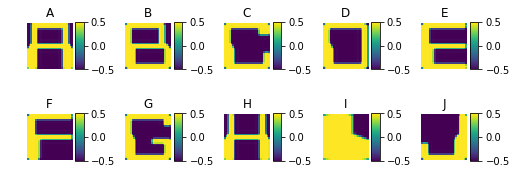

In [10]:
# code here
fig, ax = plt.subplots(2, 5, figsize=(7,7))
ax = ax.ravel()
plt.tight_layout(h_pad=-30)
#
for k, cl in enumerate(small_folders):
    with open(cl+'.pickle', 'rb') as f:
        # The protocol version used is detected automatically, so we do not
        # have to specify it.
        data = pickle.load(f)
        ax[k].axis('off')
        ax[k].set_title(cl[-1:])
        im = ax[k].imshow(data[0])
        fig.colorbar(im, ax=ax[k], aspect=5.5)


Finally if everything is correct, the above function should contain the full length of each character sample.  The labels will be stored into a separate array of *integers 0 through 9*.

Corroborate that the train_sets are in the order of ~52,000 images, and the train_set in the order of 1,870 images. 

In [11]:
def data_sets_sizes(data_set):
    
    number_files = 0;

    """ Base function: 
  
      Loads all the images listed in data_set and return it' s size
    """
        
    #Code here 
    for file in data_set:
        with open(file, 'rb') as f:
            foo = pickle.load(f) # need to store the pickle to apply len on it
            number_files += len(foo)

    
    return number_files

print('The number of data of each class of train datasets is, ',data_sets_sizes(train_datasets))
print('The number of data of each class of test datasets is, ',data_sets_sizes(test_datasets))

The number of data of each class of train datasets is,  529111
The number of data of each class of test datasets is,  18724


## Problem 3 
### Creating sub-sampled datasets.


In order to evaluate the performance of our classifiers, we need to create subsets of our data properly randomized; this means that we shouldn't choose always the first set of images to compare since we will introduce a bias because of the sampled order. A very nice post on this topic can be found below in case you wonder if it's worth the trouble.

https://machinelearningmastery.com/randomness-in-machine-learning/


Here, you have to write a function: ``sample_training_data(...)`` which should create a training dataset of a given size, containing aprox. the same number of samples for each label (-1 or +1 samples) _randomly selected_ from the ``train-dataset``; as well as the labels of the training set coded as integers from 0 (A) to 9 (J). 

Is worth mentioning that is common practice in machine learning to set aside a third dataset known as the _validation dataset_. So, in addition, you will create this extra dataset which is used to prevent overfitting and other training problems. This dataset should __NOT__ contain any image used in the traning dataset. A nice and short explanation on why this is used is presetned below (it also contains nice code hints relevant to the exercise ;) )

https://machinelearningmastery.com/difference-test-validation-datasets/


In summary:

* Create a function that returns a subset of you data. 
* The function needs to ensure a balanced subset selection. 
* The function should also return (if needed) a validation dataset.
* The returned validation dataset must not contain any repeated sample from the training dataset. 



In [12]:
import random
def sample_training_data(pickle_files, train_size, validation_size=0):

    """ Base function: 
  
      Given a train size and a validation size returns a ndarray containing a total of 
      <train_size/number_of_clases> samples, and <validation_size/number_of_clases> 
      samples for each class.
      
      Example: For a train_size = 100, validation_size = 0, the returned n_array should contain 100/10 = 10 
      samples of each character and no validation dataset. 
      
      The samples should be chose randomly.
      
      Params: 
          pickle_files: list of the pickle files (training set)
          train_size: total length of the new training set
          validation_size: total length of the validation set
      
      returns: 
          train_dataset: ndarray containing all the training images (properly normalized)
          train_labels : the labels of each selected image. 
          validation_dataset: ndarray containing all the validatiion images (properly normalized)
          validation_labels: the labels of each selected image. 
  """
    # Initialize the output dataset
    image_size = 28
    train_dataset = np.zeros((train_size,image_size,image_size))
    train_labels = np.zeros(train_size)
    
    validation_dataset = []
    validation_labels  = []
    
    if(validation_size>0):
        validation_dataset = np.zeros((validation_size,image_size,image_size))
        validation_labels = np.zeros(validation_size)
        
    # Number of total different labels
    N = len(pickle_files)
    n_train = int(train_size/N)
    n_val   = int(validation_size/N)
    
    #
    for k, file in enumerate(pickle_files):
        # Retrieve the label, we could've use the enumerate but we arenot sure files are in the right order!
        # -8 corresponds to the CAPS letter, is that dirty?? magick number? TODO
        # Converts to ASCII integer with A->0 and J->9
        labels = ord(file[-8]) - ord('A')

        with open(file, 'rb') as f:
            # Unpickle imgs
            imgs = pickle.load(f)
            
            # Shuffle the imgs to be unbiased:
            random.shuffle(imgs)

            # Select a certain amount of imgs for training
            for m, img in enumerate(imgs[0:n_train]):
                train_dataset[k*n_train+m,:,:] = img
                train_labels[k*n_train+m]  = labels
                
            # Select a certain amount of imgs for validation
            if(validation_size>0):
                for m, img in enumerate(imgs[-n_val:]):
                    validation_dataset[k*n_val+m,:,:] = img
                    validation_labels[k*n_val+m]  = labels
    
    return train_dataset, train_labels, validation_dataset, validation_labels
  

# EXAMPLE OF USE
train_size = 20000
valid_size = 10000
test_size = 10000

train_dataset, train_labels, validation_dataset, validation_labels = sample_training_data(train_datasets, train_size,valid_size);

test_dataset, test_labels, _, _ = sample_training_data(test_datasets, test_size);

print('Training size: ', train_dataset.shape, '\nLabel vector size:',train_labels.shape)
print('Testing size: ', test_dataset.shape, '\nLabel vector size:',test_labels.shape)
print('Validation size: ', validation_dataset.shape, '\nLabel vector size:',test_labels.shape)

Training size:  (20000, 28, 28) 
Label vector size: (20000,)
Testing size:  (10000, 28, 28) 
Label vector size: (10000,)
Validation size:  (10000, 28, 28) 
Label vector size: (10000,)


Finally, you need to randomize the vector so it doesn't follow any specific order: like first all the A characters and then the 'B' characters, and so on 

```(A, A, ..., A , B, B, ..., B, C, C, ...,C,... )```.


In [13]:
# Define a function to randomize THE ORDER of a given dataset.
# Be sure that the dataset and the labels are shuffled in the same order so they MATCH.

def randomize(dataset, labels):
        
    # Create a temporary array that is the shuffling operator
    X = np.arange(len(dataset))
    
    # Everyday I'm shuffling!
    random.shuffle(X)

    # Apply
    shuffled_dataset = dataset[X]
    shuffled_labels  = labels[X]
    
    return shuffled_dataset, shuffled_labels


# Shuffle the three datasets  sets
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels   = randomize(test_dataset, test_labels)
validation_dataset, validation_labels  = randomize(validation_dataset, validation_labels)

---
Problem 4
---------

Show us that your method works and all the datasets are coherent with the labels. You can display the shuffled order and show the first images for the three datasets. They should match the labels.

---

In [14]:
def plot_sorted_example(dataset, labels, suptitle='', offset=0):
    
    # Plots given data set
    fig, ax = plt.subplots(1,3)
    plt.tight_layout()
    plt.subplots_adjust(top=1.4)
    plt.suptitle(suptitle)
    for k, _ in enumerate(ax):
        im = ax[k].imshow(dataset[k+offset])
        ax[k].axis('off')
        ax[k].set_title(str(int(labels[k+offset])))
        fig.colorbar(im, ax=ax[k], aspect=5.5)
        
    plt.show()

Shuffle order for training set: [0. 6. 8. ... 2. 4. 1.]
Shuffle order for test set: [8. 7. 2. ... 0. 7. 7.]
Shuffle order for validation set: [2. 1. 7. ... 4. 8. 7.]


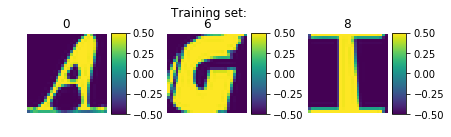

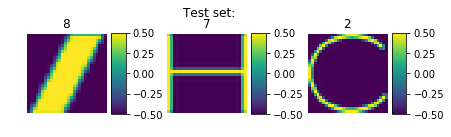

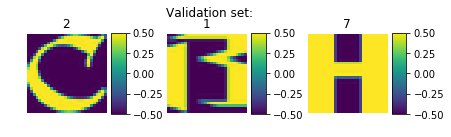

In [15]:
# Display
print("Shuffle order for training set:", train_labels)
print("Shuffle order for test set:", test_labels)
print("Shuffle order for validation set:", validation_labels)

# Plots train set
plot_sorted_example(train_dataset, train_labels, 'Training set:')
   
# Plots train set
plot_sorted_example(test_dataset, test_labels, 'Test set:')

# Plots train set
plot_sorted_example(validation_dataset, validation_labels, 'Validation set:')

---
Problem 5
---------

By default, this dataset might contain a lot of overlapping samples (repeated images with different names). As explaining before, this overlap between training, test and validation, can skew the results and cause overfitting. 

To ensure this doesn't happend, measure how much overlap there is between training, validation and test samples. 

- Check for overlapping samples in your dataset using any matric that you would like. Take into account that, if you use a computational expensive metric, this process will take very long times. Consider using a _clever_ and fast metric.

- Modify your ``sample_training_data``function and provide a curated train, validation and test dataset removing repeated samples from one of them.  Write the new function bellow.
---

##### We can use a KD-Tree to quickly compute the distance between images
TODO more blablalba

In [16]:
from scipy.spatial import cKDTree # TODO move this up, after asking T.A

def find_similarities(dataset1, dataset2, max_dist=.1, p_norm=2):
    
    # Check if we compare to nothing
    if(dataset2.size > 0):
        return list()
    
    ## Reshape all the dataset, we need data of the shape (n, k)
    # where k = image_size*image_size ) 784
    # n = len(data_set)
    dataset1_reshaped = np.reshape(dataset1, (len(dataset1), image_size*image_size))
    dataset2_reshaped = np.reshape(dataset2, (len(dataset2), image_size*image_size))


    ## Construct the corresponding KD-Tree for each reshaped dataset
    # balanced_tree=False helps to decrease computation time by a lot!
    tree = cKDTree(dataset1_reshaped, balanced_tree=False)

    ## Querry for the similar images
    # k=number of images in the dataset since we want to know all the distance to classify
    # n_jobs=-1 means we want to use all available CPUs
    idx_list = list()
    for img in dataset2_reshaped:
        dist, idx = tree.query(img, k=len(dataset1_reshaped), p=p_norm, distance_upper_bound=max_dist, n_jobs=-1)

        idx_list.append(idx)
        
    #
    return idx_list

In [17]:
def dataset_cleaner(dataset, labels, idx_list):
    # 
    if(not idx_list):
        return np.array(dataset), np.array(labels) # TODO this is a bypass hack for now
    
    # TODO comment
    labels_clean = list()
    dataset_clean = list()

    for n, rows in enumerate(idx_list):
        if(rows[rows < len(dataset)].size == 0):
            labels_clean.append(labels[n])
            dataset_clean.append(dataset[n])

    return np.array(dataset_clean), np.array(labels_clean)

----

In [18]:
import scipy as sp
def similarity(img1, img2):
    
    # Compute the similarity between 2 images or block of images using various metric
    
    
    # TODO
    
    # Juste a dummy example here
    distance = np.sum(sp.spatial.distance.cdist(img1, img2, 'euclidean'))
    
    #
    return distance

In [19]:
def check_overlap(img1, dataset, threshold, w_size=-1, w_step=-1):
        
    #
    overlap_list = list()
    
    # TODO comment
    for k, img2 in enumerate(dataset):
            
        # TODO: Crop two have two same size images???
        # Assume it is the same size???
        # WAGABOUDOUU xD
        n = min(data.shape)
            
        # Use half of the image has default behaviour
        if(w_size == -1):
            w_size = int(n/2)
            
        # Use half of the image has default behaviour
        if(w_step == -1):
            w_step = int(n/2)

        # Sliding window technic
        mean_dist = []
        for x in range(0, img.shape[0], w_step):
            for y in range(0, img.shape[1], w_step):
                mean_dist.append(similarity(img1[x:x+w_size, y:y+w_size],
                                            img2[x:x+w_size, y:y+w_size]))
            
        # Averaging over all distances for each blocks TODO, is that ok???
        mean_dist = np.mean(mean_dist)
            
        # TODO so then?? How to remove, note which are the similar image??
        if(mean_dist <= threshold):
            return True
    #
    return False

In [20]:
# TODO COMMENT
overlap_list = check_overlap(train_dataset[1], validation_dataset, 100, 14, 14)

# Sort by the most overlap thus we can verify
overlap_list

False

- Modify your ``sample_training_data``function and provide a curated train, validation and test dataset removing repeated samples from one of them.  Write the new function bellow.

In [21]:
def sample_training_data(pickle_files, train_size, validation_size=0, cured_dataset=np.array([])):

    """ Base function: 
  
      Given a train size and a validation size returns a ndarray containing a total of 
      <train_size/number_of_clases> samples, and <validation_size/number_of_clases> 
      samples for each class.
      
      Example: For a train_size = 100, validation_size = 0, the returned n_array should contain 100/10 = 10 
      samples of each character and no validation dataset. 
      
      The samples should be chose randomly.
      
      Params: 
          pickle_files: list of the pickle files (training set)
          train_size: total length of the new training set
          validation_size: total length of the validation set
      
      returns: 
          train_dataset: ndarray containing all the training images (properly normalized)
          train_labels : the labels of each selected image. 
          validation_dataset: ndarray containing all the validatiion images (properly normalized)
          validation_labels: the labels of each selected image. 
  """

    # Initialize the output dataset
    image_size = 28
    train_dataset = np.zeros((train_size,image_size,image_size))
    train_labels = np.zeros(train_size)
    
    validation_dataset = np.zeros((validation_size,image_size,image_size))
    validation_labels = np.zeros(validation_size)
        
    # TODO comment:
    if(cured_dataset.size == 0):
        cured_dataset = np.zeros((validation_size,image_size,image_size))
        
    # Number of total different labels
    N = len(pickle_files)
    n_train = int(train_size/N) # TODO magick number, taking 50% more than needed
    n_val   = int(validation_size/N)
    
    #
    for k, file in enumerate(pickle_files):
        # Retrieve the label, we could've use the enumerate but we arenot sure files are in the right order!
        # -8 corresponds to the CAPS letter, is that dirty?? magick number? TODO
        # Converts to ASCII integer with A->0 and J->9
        labels = ord(file[-8]) - ord('A')

        with open(file, 'rb') as f:
            # Unpickle imgs
            imgs = pickle.load(f)
            
            # Shuffle the imgs to be unbiased:
            random.shuffle(imgs)
            
            # TODO comment?? <- this is working well, we should keep it so its here we need to do the similarity stuff
            imgs = np.unique(imgs, axis=0)

            # Select a certain amount of imgs for training or test set
            #n,m = 0,-1
            #while(n < n_train):
                # Check if the img isn't a duplicated
             #   m += 1
             #   if(not check_overlap(imgs[m], train_dataset, 100)): #TODO MAGICK NUMBER!
             #       train_dataset[k*n_train+n,:,:] = imgs[m]
             #       train_labels[k*n_train+n]  = labels
             #       n += 1
                ###
            ###
            
            # Select a certain amount of imgs for validation set
            #n,m = 0,-1
            #while(n < n_val):
            #    # Check if the img isn't a duplicated
            #    m += 1
            #    if(not check_overlap(imgs[-m], train_dataset, 100) and (not check_overlap(imgs[-m], validation_dataset, 100))):
            #        validation_dataset[k*n_val+n,:,:] = imgs[-m]
            #        validation_labels[k*n_val+n]  = labels
            #        n += 1
                ###
            ###
            
            # Select a certain amount of imgs for training
            for m, img in enumerate(imgs[0:n_train]):
                train_dataset[k*n_train+m,:,:] = img
                train_labels[k*n_train+m]  = labels
                
            # Select a certain amount of imgs for validation
            if(validation_size>0):
                for m, img in enumerate(imgs[-n_val:]):
                    validation_dataset[k*n_val+m,:,:] = img
                    validation_labels[k*n_val+m]  = labels
     
    ##### Curing the dataset:     TODO issue with the curing of Test set, need to implement another way
    valid_list = find_similarities(train_dataset, np.concatenate((validation_dataset, cured_dataset), axis=0), max_dist=.1)
    train_dataset, train_labels = dataset_cleaner(train_dataset, train_labels, valid_list)

    ###
    return train_dataset, train_labels, validation_dataset, validation_labels

In [22]:
train_dataset, train_labels, validation_dataset, validation_labels = sample_training_data(train_datasets, train_size,valid_size);

test_dataset, test_labels, _, _ = sample_training_data(test_datasets, test_size) #TODO right now we cannot cure test

print('Training size: ', train_dataset.shape, '\nLabel vector size:',train_labels.shape)
print('Testing size: ', test_dataset.shape, '\nLabel vector size:',test_labels.shape)
print('Validation size: ', validation_dataset.shape, '\nLabel vector size:',test_labels.shape)

Training size:  (20000, 28, 28) 
Label vector size: (20000,)
Testing size:  (10000, 28, 28) 
Label vector size: (10000,)
Validation size:  (10000, 28, 28) 
Label vector size: (10000,)


In [23]:
# Shuffle the three datasets  sets
train_dataset, train_labels = randomize(train_dataset, train_labels)
test_dataset, test_labels   = randomize(test_dataset, test_labels)
validation_dataset, validation_labels  = randomize(validation_dataset, validation_labels)

Shuffle order for training set: [7. 2. 5. ... 3. 9. 7.]
Shuffle order for test set: [9. 5. 4. ... 5. 2. 0.]
Shuffle order for validation set: [4. 7. 9. ... 6. 4. 0.]


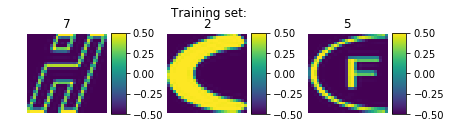

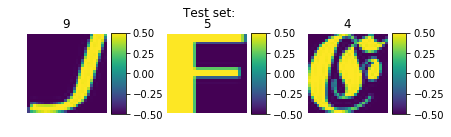

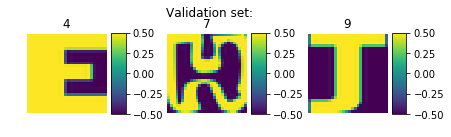

In [24]:
# Display
print("Shuffle order for training set:", train_labels)
print("Shuffle order for test set:", test_labels)
print("Shuffle order for validation set:", validation_labels)

# Plots train set
plot_sorted_example(train_dataset, train_labels, 'Training set:')
   
# Plots train set
plot_sorted_example(test_dataset, test_labels, 'Test set:')

# Plots train set
plot_sorted_example(validation_dataset, validation_labels, 'Validation set:')

---
Problem 6
---------

Let's get an idea of what a basic classifier can give you on this data. 

Train a simple model on this data using 50, 100, 1000 and 5000 training samples. 

Hint: you can use the ```LogisticRegression``` or ```LogisticRegressionCv``` model from sklearn.linear_model.

Provide a score for the prediction over the full test data set. You can use any metric from the previous chapters or an implemented one like the ```cross_val_score``` form sklearn which is more accurate.

http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html

A good choice of parameters (and regularization method) can give you results up to the 89%

```
#Samples: 50 ---> Score: 0.471428571429
#Samples: 100 ---> Score: 0.605865717935
#Samples: 1000 ---> Score: 0.760772183027
#Samples: 5000 ---> Score: 0.812826972435 
```


When you optimize the parameters, be sure to do it only to improve the resultss on the test dataset, and never use the validation dataset (otherwise it loses it purpuse).






---

In [25]:
# TODO REMOVE THIS!!! its just easier to de debug with that for the moment
import warnings
warnings.filterwarnings("ignore")

In [26]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import cross_val_score

def train_and_validate(num_examples): # TODO variables names
    
    # Regression TODO COMMENT
    foo = LogisticRegressionCV() # Tune PARAMETERS <- TODO
    gla = np.reshape(train_dataset[:num_examples], (num_examples, image_size*image_size))
    clf = foo.fit(gla, train_labels[:num_examples])
    
    # Score
    gla = np.reshape(test_dataset[:num_examples], (num_examples, image_size*image_size))
    score = cross_val_score(foo, gla, test_labels[:num_examples], cv=3)
    
    # Predict  TODO remove???
    # Plot the results
    fig, ax = plt.subplots(1,2)
    plt.tight_layout()
    
    n_rand = random.randint(1,num_examples)
    ax[0].imshow(test_dataset[n_rand])
    ax[0].axis('off')
    ax[0].set_title('Predicted: ' + str(clf.predict(gla[n_rand:n_rand+1, :])))

    n_rand = random.randint(0,num_examples)
    ax[1].imshow(test_dataset[n_rand])
    ax[1].axis('off')
    ax[1].set_title('Predicted: ' + str(clf.predict(gla[n_rand:n_rand+1, :])))
    
    plt.show()
    
    
    return np.mean(score) # TODO should we return also the deviation?

Cross Validation Score



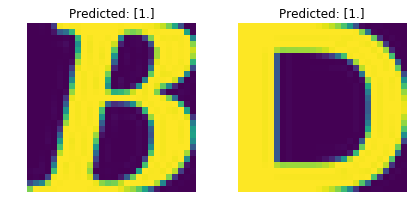

Samples: 50 ---> Score: 0.5949432404540764


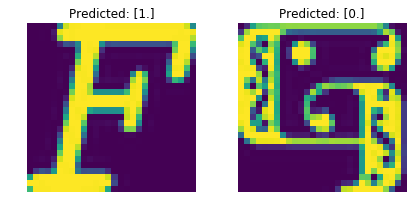

Samples: 100 ---> Score: 0.7909460558416915


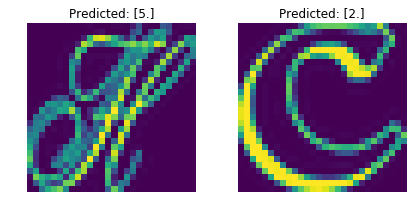

Samples: 1000 ---> Score: 0.8491360817125414


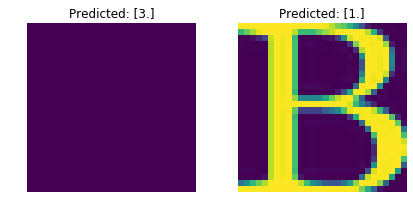

Samples: 5000 ---> Score: 0.869597490635606


In [27]:
training_sizes = [50, 100, 1000, 5000]

print("Cross Validation Score\n")
for size in training_sizes:
    score = train_and_validate(size)
    print("Samples:", size,"---> Score:", score)
    
    
#Samples: 50 ---> Score: 0.471428571429
#Samples: 100 ---> Score: 0.605865717935
#Samples: 1000 ---> Score: 0.760772183027
#Samples: 5000 ---> Score: 0.812826972435

##### TODO (réponse de l'assistant):
- Ptêt faire autrement qu'avec le KD Tree, (purge grossier avec le tree pis métric avec les trucs intra classe ptet?)
- Retirer tous les doublons! Intra et inter dataset
- Lorsqu'on utilise cross_val, faire la moyenne et la deviation
- Fine tune les hyperparamètre avec cette connaissance

# Part 2) Deep Learning - Intro to Deep Neural Networks

## Simple Linear Model and Multi-layer Perceptron (MLP)


## Introduction

In the last couple of years, deep learning has produced state-of-the-art results in many computer vision tasks. In this section, a practical overview of deep Learning's basic concepts has been provided and we are going to work with a simple linear and multi-layer perceptron (MLP) models.

At its core, deep learning is a class of neural network models. That is a model with an input layer, an output layer, and an arbitrary number of hidden layers. These layers are made up of neurons or neural units. They are called neurons because they share some similarities with the behaviour of the neurons present in the human brain. For our purposes, we can think of a neuron as a nonlinear function of the weighted sum of its inputs. Since the neuron is really the most basic part of any deep learning model it is a good place to start. 

As the starting point, we continue to work the notMNIST dataset. After loading the dataset, we define and optimize a simple mathematical model in TensorFlow. The results are then plotted and discussed. First, we import tensorflow with other needed packages:

In [28]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
from sklearn.metrics import confusion_matrix

In [29]:
tf.__version__

'1.13.1'

Using your function defined above create a training, test, and validation dataset. The dataset should be splitted into 3 mutually exclusive sub-sets (200000 training images, 10000 validation and 10000 test images, respectively). You can display the images in each sub-set. They should match the labels.

In [30]:
#Code here:
#TODOOOOO

# Display the openend files
print("Training Set ", train_dataset.shape, train_labels.shape)
print("Validation Set", validation_dataset.shape, validation_labels.shape)
print("Test Set", test_dataset.shape,test_dataset.shape)


#Training Set  (20000, 28, 28) (20000,)
#Validation Set (10000, 28, 28) (10000,)
#Test Set (10000, 28, 28) (10000, 28, 28)

Training Set  (20000, 28, 28) (20000,)
Validation Set (10000, 28, 28) (10000,)
Test Set (10000, 28, 28) (10000, 28, 28)


In [31]:
IMAGE_SIZE = 28
IMAGE_SHAPE=(IMAGE_SIZE,IMAGE_SIZE)

def plot_images(images, cls_true, cls_pred=None):
    assert len(images) == len(cls_true) == 9
    
    # Create figure with 3x3 sub-plots.
    fig, axes = plt.subplots(3, 3)
    fig.subplots_adjust(hspace=0.3, wspace=0.3)

    for i, ax in enumerate(axes.flat):
        # Plot image.
        ax.imshow(images[i].reshape(IMAGE_SHAPE), cmap='binary')

        # Show true and predicted classes.
        if cls_pred is None:
            xlabel = "True: {0}".format(cls_true[i])
        else:
            xlabel = "True: {0}, Pred: {1}".format(cls_true[i], cls_pred[i])

        ax.set_xlabel(xlabel)
        
        # Remove ticks from the plot.
        ax.set_xticks([])
        ax.set_yticks([])
        
    # Ensure the plot is shown correctly with multiple plots
    # in a single Notebook cell.
    plt.show()

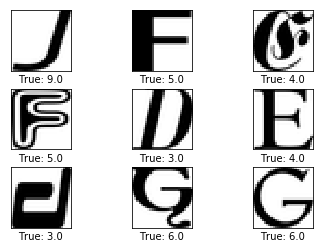

In [32]:
# Get the first images from the test-set.
images = test_dataset[0:9]

# Get the true classes for those images.
cls_true = test_labels[0:9]

# Plot the images and labels using our helper-function above.
plot_images(images=images, cls_true=cls_true)

### One-Hot Encoding and Image Flattened Mode

Our labels contain a list of predictions for our examples, e.g. [1, 9, ...]. In tensorflow and many other machine learning API's, the label has to be converted to the encoding format as so-called One-Hot encoding. This means the labels have been converted from a single number to a vector whose length equals the number of possible classes. All elements of the vector are zero except for the $i$'th element which is one and means the class is $i$.

In addition, because we are going to use linear layers and multiplications of the neural network, you always want your data to be a (1 or) 2-dimensional matrix, where each row is the vector representing your data. Therefore, it would be more complicated and less efficient without reshaping images first. Here, we need to flatten images before passing them to our model. As an example, please print out the One-Hot encoded labels for the first 5 images in the test set.


In [33]:
def reformat(dataset, labels):
    """
        Reformat the data to the one-hot and flattened mode
    """
    n_dataset = dataset.reshape((-1, IMAGE_SIZE * IMAGE_SIZE)).astype(np.float32)

    # Convert to the one hot format
    n_labels = (np.arange(NUM_LABELS) == labels[:, None]).astype(np.float32)

    return n_dataset, n_labels


NUM_LABELS = 10

TRAIN_DATASET, TRAIN_LABELS = reformat(train_dataset, train_labels)
VALID_DATASET, VALID_LABELS = reformat(validation_dataset, validation_labels)
TEST_DATASET, TEST_LABELS = reformat(test_dataset, test_labels)

# Display the files
print("Training Set ", TRAIN_DATASET.shape, TRAIN_LABELS.shape)
print("Validation Set", VALID_DATASET.shape, VALID_LABELS.shape)
print("Test Set", TEST_DATASET.shape, TEST_LABELS.shape)

Training Set  (20000, 784) (20000, 10)
Validation Set (10000, 784) (10000, 10)
Test Set (10000, 784) (10000, 10)


In [34]:
TEST_LABELS[0:5, :]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.]], dtype=float32)

## TensorFlow Graph

The entire purpose of TensorFlow is to have a so-called computational graph that can be executed much more efficiently than if the same calculations were to be performed directly in Python. TensorFlow can be more efficient than NumPy because TensorFlow knows the entire computation graph that must be executed, while NumPy only knows the computation of a single mathematical operation at a time.

TensorFlow can also automatically calculate the gradients that are needed to optimize the variables of the graph to make the model perform better. This is because the graph is a combination of simple mathematical expressions so the gradient of the entire graph can be calculated using the chain rule for derivatives.


A TensorFlow graph consists of the following parts which will be detailed below:

* Placeholder variables used to change the input to the graph.
* Model variables that are going to be optimised to make the model perform better.
* The model which is essentially just a mathematical function that calculates some output given the input in the placeholder variables and the model variables.
* A cost measure that can be used to guide the optimization of the variables.
* An optimization method which updates the variables of the model.

In addition, the TensorFlow graph may also contain various debugging statements, e.g. for logging data to be displayed using TensorBoard, which is not covered here.

### Default graph

As the starting point, we create a new computational graph via the `tf.Graph` constructor. To add operations to this graph, we must register it as the default graph. The way the TensorFlow API is designed, library routines that create new operation nodes always attach these to the current default graph. We register our graph as the default by using it as a Python context manager in a `with-as` statement.


## Placeholder variables

Placeholder variables serve as the input to the graph that we may change each time we execute the graph. We call this feeding the placeholder variables and it is demonstrated further below.

First, we define the placeholder variable for the input images including train and validation set. This allows us to change the images that are input to the TensorFlow graph. This is a so-called tensor, which just means that it is a multi-dimensional vector or matrix. The data-type is set to `float32` and the shape is set to `[None, IMAGE_SIZE_FLAT]`, where `None` means that the tensor may hold an arbitrary number of images with each image being reshaped into a vector of length `IMAGE_SIZE_FLAT` which is equal to IMAGE_SIZE * IMAGE_SIZE. In addition, we create a constant tensor for the validation and test set since they are fixed and will be evaluated later.   


Next we have the placeholder variable for the true labels associated with the images that were input in the placeholder variable TF_TRAIN_DATASET. The shape of this placeholder variable is [None, NUM_LABELS] which means it may hold an arbitrary number of labels and each label is a vector of length NUM_LABELS which is 10 in this case.

### Variables to be optimized

Apart from the placeholder variables that were defined above and which serve as feeding input data into the model, there are also some model variables that must be changed by TensorFlow to make the model perform better on the training data.

In fact, the model variables are the network hidden layer parameters including layer's weights and biases. The first variable that must be optimized are WEIGHTS and defined here as a TensorFlow variable that must be initialized and whose shape is [IMAGE_SIZE_FLAT, NUM_LABELS] for the simple linear model, so it is a 2-dimensional tensor (or matrix) with IMAGE_SIZE_FLAT rows and NUM_LABELS columns. There are various ways to initialize the weights like initialization with zeros tf.zeros, tf.truncated_normal and tf.random_normal, which output random values from a normal distribution and you can specify the mean and The standard deviation (stddev) of the normal distribution.

The second variable that must be optimized is called BIASES and is defined as a 1-dimensional tensor (or vector) of length NUM_LABELS.

Last but not least, you should name every important operation in your code. In complex models, it is good practice to use scopes. The important point is that if you want to later use some operation, you have to either name it or put it into a collection.


### Model

This simple mathematical model multiplies the training images in the placeholder variable TF_TRAIN_DATASET with the WEIGHTS and then adds the BIASES.

The result is a matrix of shape [NUM_IMAGES, NUM_LABELS] because TF_TRAIN_DATASET has shape [NUM_IMAGES, IMAGE_SIZE_FLAT] and WEIGHTS has shape [IMAGE_SIZE_FLAT, NUM_LABELS], so the multiplication of those two matrices is a matrix with shape [NUM_IMAGES, NUM_LABELS] and then the BIASES vector is added to each row of that matrix.

However, these estimates are a bit rough and difficult to interpret because the numbers may be very small or large, so we want to normalize them so that each row of the LOGITS matrices sums to one (see below code), and each element is limited between zero and one. This is calculated using the so-called softmax function tf.nn.softmax.


### Cost-function to be optimized

To make the model better at classifying the input images, we must somehow change the variables for `WEIGHTS` and `BIASES`. To do this, we first need to know how well the model currently performs by comparing the predicted output of the model to the desired output.

The cross-entropy is a performance measure used in classification. The cross-entropy is a continuous function that is always positive and if the predicted output of the model exactly matches the desired output then the cross-entropy equals zero. The goal of optimization is, therefore, to minimise the cross-entropy, so it gets as close to zero as possible by changing the `WEIGHTS` and `BIASES` of the model.

TensorFlow has a built-in function for calculating the cross-entropy using `tf.nn.softmax_cross_entropy_with_logits`. Note that it uses the values of the `LOGITS` in train, validation and test sets because it also calculates the softmax internally. In order to use the cross-entropy to guide the optimization of the model's variables we need a single scalar value, so we simply take the average of the cross-entropy using (`tf.reduce_mean`) for all the image classifications.

### Optimization method

Now that we have a cost measure that must be minimized, we can then create an optimizer. In this case it is the basic form of Gradient Descent where the step-size is set to 0.5.

Note that optimization is not performed at this point. In fact, nothing is calculated at all, we just add the optimizer-object to the TensorFlow graph for later execution.

In [35]:
IMAGE_SIZE_FLAT=IMAGE_SIZE * IMAGE_SIZE

# Create a new graph
GRAPH = tf.Graph()

# Register the graph as the default one to add nodes
with GRAPH.as_default():
    
    # Define placeholders
    TF_TRAIN_DATASET = tf.placeholder(tf.float32, shape=(None, IMAGE_SIZE * IMAGE_SIZE))
    TF_TRAIN_LABELS = tf.placeholder(tf.float32, shape=(None, NUM_LABELS))
    TF_VALID_DATASET = tf.constant(VALID_DATASET)
    TF_TEST_DATASET = tf.constant(TEST_DATASET)
    
    with tf.name_scope("Linear_model"):
        
        """
           Initialize weights and biases
        """
        
        WEIGHTS = tf.Variable(tf.random_normal(shape=[IMAGE_SIZE_FLAT, NUM_LABELS], stddev=0.1))
        BIASES = tf.Variable(tf.zeros([NUM_LABELS]))
    
        """
           Compute the logits WX + b
        """ 
        TRAIN_LOGITS = tf.matmul(TF_TRAIN_DATASET, WEIGHTS) + BIASES
        VALID_LOGTIS = tf.matmul(TF_VALID_DATASET, WEIGHTS) + BIASES
        TEST_LOGITS = tf.matmul(TF_TEST_DATASET, WEIGHTS) + BIASES
    
        """
           Softmax function
        """   
        TRAIN_PREDICTION = tf.nn.softmax(TRAIN_LOGITS)
        VALID_PREDICTION = tf.nn.softmax(VALID_LOGTIS)
        TEST_PREDICTION = tf.nn.softmax(TEST_LOGITS)
    
        """
           Cost-function
        """
        CROSS_ENTROPY= tf.nn.softmax_cross_entropy_with_logits_v2(logits=TRAIN_LOGITS, labels=TF_TRAIN_LABELS)
        COST= tf.reduce_mean(CROSS_ENTROPY)
        # Optimizer
        OPTIMIZER = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(COST)

Instructions for updating:
Colocations handled automatically by placer.


In [36]:
def accuracy(predictions, labels):
    """
        Divides the number of true predictions to the number of total predictions
    """
    return (100.0 * np.sum(np.argmax(predictions, 1) == np.argmax(labels, 1)) / predictions.shape[0])

def print_confusion_matrix(predictions, labels):

    # Convert the One-Hot encoded vectors to a single number by taking the index of the highest element
    labels=np.array([label.argmax() for label in labels])
    predictions = np.array([prediction.argmax() for prediction in predictions])

    # Get the confusion matrix using sklearn.
    cm = confusion_matrix(y_true=labels,
                          y_pred=predictions)

    # Print the confusion matrix as text.
    print(cm)

    # Plot the confusion matrix as an image.
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)

    # Make various adjustments to the plot.
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(NUM_LABELS)
    plt.xticks(tick_marks, range(NUM_LABELS))
    plt.yticks(tick_marks, range(NUM_LABELS))
    plt.xlabel('Predicted')
    plt.ylabel('True')

    # Ensure the plot is shown correctly with multiple plots
    plt.show()

## TensorFlow Run

### Create TensorFlow session

Once the TensorFlow graph has been created, we have to create a TensorFlow session which is used to execute the graph and train our model. For this, we enter a session environment using a `tf.Session` as a context manager. We pass our graph  object to its constructor, so that it knows which graph to manage. To then execute nodes, we have several options. The   most general way is to call Session.run() and pass a list of tensors we wish to compute. Alternatively, we may call `eval()` on  tensors and `run()` on  operations directly.

Before evaluating any other node, we must first ensure that the variables in our graph are initialized. Theoretically,  we could `run` the `Variable.initializer` operation for each variable. However, one most often just uses the
`tf.initialize_all_variables()` utility operation provided by TensorFlow, which in turn executes the `initializer` 
operation for each `Variable` in the graph. Then, we can perform a certain number of iterations of stochastic gradient  descent, fetching an example and label from the notMNIST dataset each time and feeding it to the run routine. 

One important point is that, there are 200,000 images in the training-set. It takes a long time to calculate the gradient of the model using all these images. We therefore use Stochastic Gradient Descent which only uses a small batch of images in each iteration of the optimizer.

In [37]:
BATCH_SIZE = 32
NUM_ITERATIONS = 20000

Variables initialized
Minibatch loss at step  0 :  2.9783769
Minibatch accuracy:  15.625
Validation accuracy:  13.67
Minibatch loss at step  500 :  2.0697093
Minibatch accuracy:  50.0
Validation accuracy:  32.37
Minibatch loss at step  1000 :  1.7623016
Minibatch accuracy:  56.25
Validation accuracy:  30.07
Minibatch loss at step  1500 :  1.540539
Minibatch accuracy:  59.375
Validation accuracy:  37.24
Minibatch loss at step  2000 :  1.1099348
Minibatch accuracy:  71.875
Validation accuracy:  34.25
Minibatch loss at step  2500 :  1.5494002
Minibatch accuracy:  71.875
Validation accuracy:  35.17
Minibatch loss at step  3000 :  1.7808423
Minibatch accuracy:  62.5
Validation accuracy:  30.28
Minibatch loss at step  3500 :  1.0989435
Minibatch accuracy:  71.875
Validation accuracy:  32.95
Minibatch loss at step  4000 :  1.2244164
Minibatch accuracy:  65.625
Validation accuracy:  35.13
Minibatch loss at step  4500 :  0.67044955
Minibatch accuracy:  81.25
Validation accuracy:  34.32
Minibatc

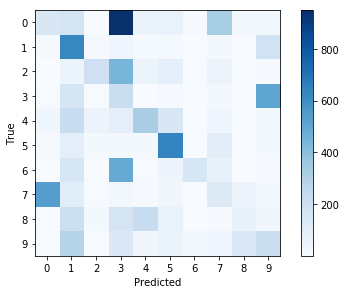

In [38]:

with tf.Session(graph=GRAPH) as session:
    """
        Start the above variable initialization
    """
    init = tf.global_variables_initializer()
    session.run(init)

    print("Variables initialized")

    for step in range(NUM_ITERATIONS):
        """
            Generate a random base and then generate a minibatch
        """
        BASE = (step * BATCH_SIZE) % (TRAIN_LABELS.shape[0] - BATCH_SIZE)
        BATCH_DATA = TRAIN_DATASET[BASE:(BASE + BATCH_SIZE), :]
        BATCH_LABELS = TRAIN_LABELS[BASE:(BASE + BATCH_SIZE), :]
        """
            Feed the current session with batch data
        """
        FEED_DICT = {TF_TRAIN_DATASET: BATCH_DATA, TF_TRAIN_LABELS: BATCH_LABELS}
        _, l, predictions = session.run([OPTIMIZER, COST, TRAIN_PREDICTION], feed_dict=FEED_DICT)

        if(step % 500 == 0):
            print("Minibatch loss at step ", step, ": ", l)
            print("Minibatch accuracy: ", accuracy(predictions, BATCH_LABELS))
            print("Validation accuracy: ", accuracy(VALID_PREDICTION.eval(), VALID_LABELS))
            
        if (step == NUM_ITERATIONS-1):
            print("Test accuracy: ", accuracy(TEST_PREDICTION.eval(), TEST_LABELS))
            print_confusion_matrix(TEST_PREDICTION.eval(), TEST_LABELS)

## Problem 7: Comment on the accuracy of the classifier, what is the meaning of each entry, and comment the confussion matrix results. 

Each entry in the confusion matrix relates the number of images that have been predicted to represent a certain value, with the true value of the image indicated for each row. The entries on the main diagonal are therefore the ones representing the correct predictions, i.e the predicted and the true values are the same, while all the other entries are errors done by the classifeir.

## Multilayer Perceptron (MLP)

The next architecture we are going to work with is multilayer perceptron (MLP). An MLP can be viewed as a logistic regression classifier where the input is first transformed using some non-linear transformations of the intermediate network layers. These intermediate layers are referred to as a `hidden layers`. Here, we are going to define TF graph for the MLP model with two hidden layers and one output layer. First, let’s draw the model the MLP represents:


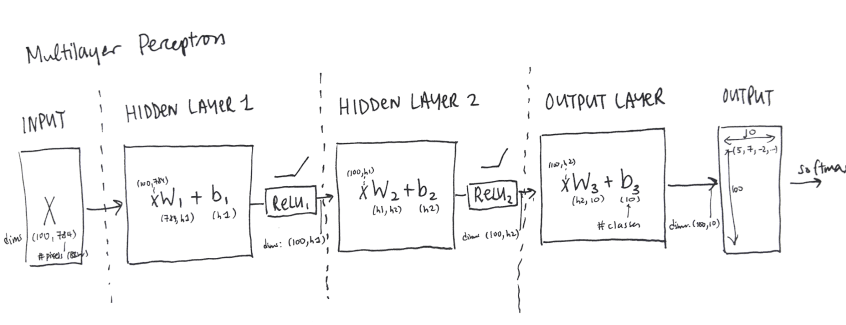

In [39]:
from IPython.core.display import Image 
Image(filename='../data/multilayer-perceptron-drawing.png')

## Problem 8

In our example above, the MLP model has two hidden layers with sizes of `HIDDEN_NODES_1=102` and `HIDDEN_NODES_2=51`, respectively. In a MLP, every element of a previous layer is connected to every element of the next layer. For example, the weights in the second hidden layer has `shape=[HIDDEN_NODES_1, HIDDEN_NODES_2]`. 

Now, lets define MLP graph with two hidden layers (in the following exercise you should only use train and test sets):

In [40]:
#Define the number of nodes for the hidden layers
HIDDEN_NODES_1=102
HIDDEN_NODES_2=51

MLP_GRAPH = tf.Graph()

#Code Here.
with MLP_GRAPH.as_default():
    
    # Define placeholders
    TF_TRAIN_DATASET = tf.placeholder(tf.float32, shape=(None, IMAGE_SIZE * IMAGE_SIZE))
    TF_TRAIN_LABELS = tf.placeholder(tf.float32, shape=(None, NUM_LABELS))
    TF_TEST_DATASET = tf.constant(TEST_DATASET)
    
    with tf.name_scope("Linear_model"):
        
        #Code Here.
        """
            Hidden Layer 1
        """
        
        WEIGHTS_H1 = tf.Variable(tf.random_normal(shape=[IMAGE_SIZE_FLAT, HIDDEN_NODES_1], stddev=0.1))
        BIASES_H1 = tf.Variable(tf.zeros([HIDDEN_NODES_1]))
    
        #TRAIN_LOGITS = tf.matmul(TF_TRAIN_DATASET, WEIGHTS) + BIASES
        #VALID_LOGTIS = tf.matmul(TF_VALID_DATASET, WEIGHTS) + BIASES
        #TEST_LOGITS = tf.matmul(TF_TEST_DATASET, WEIGHTS) + BIASES
        
        TRAIN_H1 = tf.matmul(TF_TRAIN_DATASET, WEIGHTS_H1) + BIASES_H1
        #VALID_H1 = tf.matmul(TF_VALID_DATASET, WEIGHTS_H1) + BIASES_H1
        TEST_H1 = tf.matmul(TF_TEST_DATASET, WEIGHTS_H1) + BIASES_H1
        
        TRAIN_LOGIT_H1 = tf.nn.relu(TRAIN_H1)
        #VALID_LOGIT_H1 = tf.nn.relu(VALID_H1)
        TEST_LOGIT_H1 = tf.nn.relu(TEST_H1)
        
        """
            Hidden Layer 2
        """
        
        WEIGHTS_H2 = tf.Variable(tf.random_normal(shape=[HIDDEN_NODES_1, HIDDEN_NODES_2], stddev=0.1))
        BIASES_H2 = tf.Variable(tf.zeros([HIDDEN_NODES_2]))
        
        TRAIN_H2 = tf.matmul(TRAIN_LOGIT_H1, WEIGHTS_H2) + BIASES_H2
        #VALID_H2 = tf.matmul(VALID_LOGIT_H1, WEIGHTS_H2) + BIASES_H2
        TEST_H2 = tf.matmul(TEST_LOGIT_H1, WEIGHTS_H2) + BIASES_H2
        
        TRAIN_LOGIT_H2 = tf.nn.relu(TRAIN_H2)
        #VALID_LOGIT_H2 = tf.nn.relu(VALID_H2)
        TEST_LOGIT_H2 = tf.nn.relu(TEST_H2)
        
        """
            Output
        """
        
        WEIGHTS_OUTPUT = tf.Variable(tf.random_normal(shape=[HIDDEN_NODES_2, 10], stddev=0.1))
        BIASES_OUTPUT = tf.Variable(tf.zeros([10]))
        
        TRAIN_OUTPUT = tf.matmul(TRAIN_LOGIT_H2, WEIGHTS_OUTPUT) + BIASES_OUTPUT
        #VALID_OUTPUT = tf.matmul(VALID_LOGIT_H2, WEIGHTS_OUTPUT) + BIASES_OUTPUT
        TEST_OUTPUT = tf.matmul(TEST_LOGIT_H2, WEIGHTS_OUTPUT) + BIASES_OUTPUT
        
        TRAIN_LOGIT_OUTPUT = tf.nn.relu(TRAIN_OUTPUT)
        #VALID_LOGIT_OUTPUT = tf.nn.relu(VALID_OUTPUT)
        TEST_LOGIT_OUTPUT = tf.nn.relu(TEST_OUTPUT)
        
        """
           Softmax function
        """   
        TRAIN_PREDICTION = tf.nn.softmax(TRAIN_LOGIT_OUTPUT)
        #VALID_PREDICTION = tf.nn.softmax(VALID_LOGIT_OUTPUT)
        TEST_PREDICTION = tf.nn.softmax(TEST_LOGIT_OUTPUT)
    
        """
           Cost-function
        """
        CROSS_ENTROPY= tf.nn.softmax_cross_entropy_with_logits_v2(logits=TRAIN_OUTPUT, labels=TF_TRAIN_LABELS)
        COST= tf.reduce_mean(CROSS_ENTROPY)
        # Optimizer
        OPTIMIZER = tf.train.GradientDescentOptimizer(learning_rate=0.5).minimize(COST)

## Problem 9

As mentioneded before, in an MLP, the number of parameters (weights w_i and b_i)to learn is proporcional to the number of layers and neurons on each of those layers. In here make the computation of the number of parameters for the network that you constructed above.


In [41]:
nb_parameters = 100 * HIDDEN_NODES_1 + HIDDEN_NODES_1 * HIDDEN_NODES_2 + HIDDEN_NODES_2 * 10 + HIDDEN_NODES_1 + HIDDEN_NODES_2 + 10
print("The number of parameters necessary for the network is: ", nb_parameters)

The number of parameters necessary for the network is:  16075


### Helper-function to perform optimization iterations

Here, we build a function for performing a number of optimization iterations so as to gradually improve the weights and biases of the MLP model. In each iteration, a new batch of data is selected from the training-set and then TensorFlow executes the optimizer using those training samples. The inputs of the function are the number of iterations `NUM_ITERATIONS` and number of used samples `NUM_SAMPLES` to train the model

In [42]:
def optimize(NUM_ITERATIONS, NUM_SAMPLES):
    
    with tf.Session(graph=MLP_GRAPH) as session:

        """
            Start the above variable initialization
        """
        # tf.initialize_all_variables().run()  
        tf.global_variables_initializer().run()

        print("Variables initialized")

        for step in range(NUM_ITERATIONS):
            """
                Select the desired samples
            """
            TRAIN_DATASET_S = TRAIN_DATASET[:NUM_SAMPLES]
            TRAIN_LABELS_S = TRAIN_LABELS[:NUM_SAMPLES]
            """
                Generate a random base and then generate a minibatch
            """
            
            indices = np.random.choice(range(TRAIN_LABELS_S.shape[0]
                                             ), BATCH_SIZE)
            BATCH_DATA = TRAIN_DATASET_S[indices, :]
            BATCH_LABELS = TRAIN_LABELS_S[indices, :]

            """
                Feed the current session with batch data
            """
            FEED_DICT = {TF_TRAIN_DATASET: BATCH_DATA, TF_TRAIN_LABELS: BATCH_LABELS}
            _, l, predictions = session.run([OPTIMIZER, COST, TRAIN_PREDICTION], feed_dict=FEED_DICT)

            if (step == NUM_ITERATIONS - 1):
                acc=accuracy(TEST_PREDICTION.eval(), TEST_LABELS)
                print("Test accuracy: ", accuracy(TEST_PREDICTION.eval(), TEST_LABELS))

    return acc

optimize(NUM_ITERATIONS=100, NUM_SAMPLES=5000)

Variables initialized
Test accuracy:  57.4


57.4

# Keras API

Keras is a high-level API for tensorflow used to build deep learning models in a fast and more "user friendly" way. The API was “designed for human beings, not machines,” and “follows best practices for reducing cognitive load.” Neural layers, cost functions, optimizers, initialization schemes, activation functions, and regularization schemes are all standalone modules that you can combine to create new models. New modules are simple to add, as new classes and functions.  

tf.keras is TensorFlow's implementation of the Keras API specification. This is a high-level API to build and train models that includes first-class support for TensorFlow-specific functionality, such as eager execution, tf.data pipelines, and Estimators. tf.keras makes TensorFlow easier to use without sacrificing flexibility and performance.

## Problem 10:

Following the example below, modify it to generate the same network constructed in problem 8. The network must have the same number of hidden layers, neurons per layer and learning rate. Feel free to explore the tensorflow´s documentation where this example was taken. https://www.tensorflow.org/guide/keras#entire_model .


In [43]:
# MODIFY ME:
    
from tensorflow.keras import layers

print(tf.VERSION)
print(tf.keras.__version__)

#Creates a Sequential model with Dense layers.
model = tf.keras.Sequential()


#Dense implements the operation:
#        output = activation(dot(input, kernel) + bias)
#Units are the dimensionality of the output space for the layer,
#     which equals the number of hidden units
#Activation and loss functions may be specified by strings or classes

# Adds a densely-connected layer with 64 units to the model:
model.add(layers.Dense(HIDDEN_NODES_1, activation='relu'))

# Add another:
model.add(layers.Dense(HIDDEN_NODES_2, activation='relu'))

# Add a softmax layer with 10 output units:
model.add(layers.Dense(10, activation='softmax'))

#The compile method configures the model’s learning process
model.compile(optimizer=tf.train.AdamOptimizer(0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#The fit method does the training in batches
model.fit(TRAIN_DATASET, TRAIN_LABELS, epochs=10, batch_size=32)


1.13.1
2.2.4-tf
Instructions for updating:
Use tf.cast instead.
Epoch 1/10
20000/20000 [==============================] - 2s 115us/sample - loss: 1.0367 - acc: 0.6636
Epoch 2/10
20000/20000 [==============================] - 2s 104us/sample - loss: 0.7683 - acc: 0.7541
Epoch 3/10
20000/20000 [==============================] - 2s 101us/sample - loss: 0.6640 - acc: 0.7857
Epoch 4/10
20000/20000 [==============================] - 2s 104us/sample - loss: 0.5876 - acc: 0.8116
Epoch 5/10
20000/20000 [==============================] - 2s 106us/sample - loss: 0.5304 - acc: 0.8274
Epoch 6/10
20000/20000 [==============================] - 2s 106us/sample - loss: 0.4795 - acc: 0.8450
Epoch 7/10
20000/20000 [==============================] - 2s 92us/sample - loss: 0.4326 - acc: 0.8609
Epoch 8/10
20000/20000 [==============================] - 2s 87us/sample - loss: 0.3978 - acc: 0.8704
Epoch 9/10
20000/20000 [==============================] - 2s 93us/sample - loss: 0.3621 - acc: 0.8806
Epoch 10/10


In [44]:
#The evaluate method calculates the losses and metrics
#     for the trained mode
loss_and_metrics = model.evaluate(TEST_DATASET, TEST_LABELS, batch_size=1280)

#The predict method applies the trained model to inputs
#     to generate outputs
classes = model.predict(TEST_DATASET, batch_size=128)

print(loss_and_metrics)

10000/10000 [==============================] - 0s 14us/sample - loss: 2.2373 - acc: 0.6000
[2.2372835330963134, 0.6]


## Problem 11: Finally, in here, you are asked to modify the network architecture to improve the classification results.


Your network can have any number of layers, you can use any loss function, and quality metric. __HOWEVER__ your resulting model must not exceed a total of 20,000 _learnable parameters_ -- This is the total number of weights to optimize in the sequential model. If you are not sure what we are talking about, here's a nice explanation.

https://towardsdatascience.com/counting-no-of-parameters-in-deep-learning-models-by-hand-8f1716241889

* Show the performance of your network using ONLY the training set. 
* Compute and explain the number fo parameters of your network.


In [45]:
# Code here

## Comparison of hand-craft feature based SVM, and Random Forest, and MLP 

Regarding the neural networks with several layers with large number of neurons, an increase in the layers/neurons will increase the capacity of the network (not accuracy). 

To generalize these large networks a significantly large number of training samples are required (atleast 10 times the number of parameters in a network) otherwise it will simply over fit even with regularization constraints. However, for the problem with quite small samples, SVM (kernel), Logistic Regression, or Random Forest classifiers, etc. may gives better performance. 

On the other hand, when there are large number of training samples, the deep learning based model can reach much better performance. Here, we aim to train three models -- SVM, Random Forest and MLP -- using a varying number of training samples. For a fair comparision, we only use image raw features, but other hand-crafted features such as HOG can be used to train SVM model.


For the random forest and SVM you should use the implementations included in sklearn with default parameters. If you wish to modify this paramters, be sure to use only the test dataset to perform the hyperparameter tuning. 

`from sklearn.svm import LinearSVC`
`from sklearn.ensemble import RandomForestClassifier`

## Problem 12: Write below your implementation of both classifiers.

In [46]:
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

In [52]:
def train_and_validate(NUM_SAMPLES):
    
    score = dict.fromkeys(['SVM', 'Forest'])
    score['SVM'], score['Forest'] = {}, {}
    
    training_sample = TRAIN_DATASET[0:NUM_SAMPLES]
    label_training_sample = TRAIN_LABELS[0:NUM_SAMPLES]
    label_training_sample = (label_training_sample == 1).argmax(axis=1)
    
    test_sample = TEST_DATASET[0:NUM_SAMPLES]
    label_test_sample = TEST_LABELS[0:NUM_SAMPLES]
    label_test_sample = (label_test_sample == 1).argmax(axis=1)
    
    validation_sample = VALID_DATASET[0:NUM_SAMPLES]
    label_validation_sample = VALID_DATASET[0:NUM_SAMPLES]
    label_validation_sample = (label_validation_sample == 1).argmax(axis=1)
    
    # Training the two classifiers with the training set and validation
    
    svm_classifier = LinearSVC()
    svm_classifier.fit(training_sample, label_training_sample)
    svm_validation = svm_classifier.predict(validation_sample)
    svm_validation_score = np.sum(svm_validation == label_validation_sample)
    score['SVM']['Validation'] = svm_validation_score / NUM_SAMPLES
    
    random_forest_classifier = RandomForestClassifier()
    random_forest_classifier.fit(training_sample, label_training_sample)
    forest_validation = random_forest_classifier.predict(validation_sample)
    forest_validation_score = np.sum(forest_validation == label_validation_sample)
    score['Forest']['Validation'] = forest_validation_score / NUM_SAMPLES
    
    # Qualification of the two classifiers with the test set
    
    svm_prediction = svm_classifier.predict(test_sample)
    svm_score = np.sum(svm_prediction == label_test_sample)
    score['SVM']['Test'] = svm_score / NUM_SAMPLES
    
    forest_prediction = random_forest_classifier.predict(test_sample)
    forest_score = np.sum(forest_prediction == label_test_sample)
    score['Forest']['Test'] = forest_score / NUM_SAMPLES

    return score
    
    
#Example
TRAINING_SIZES = [1000, 2000]

for size in TRAINING_SIZES:
    score = train_and_validate(size)
    print("Samples:", size, "---> Score:", score)
    
# Samples: 1000 ---> Score: 0.7900200000000001
# Samples: 2000 ---> Score: 0.78766


Samples: 1000 ---> Score: {'SVM': {'Validation': 0.097, 'Test': 0.329}, 'Forest': {'Validation': 0.012, 'Test': 0.435}}
Samples: 2000 ---> Score: {'SVM': {'Validation': 0.0645, 'Test': 0.294}, 'Forest': {'Validation': 0.015, 'Test': 0.469}}


## Problem 13

Now, in here we want to train and compare a SVM model and a Random Foest model, against the MLP model that you created. You should use a varying number of training samples including 200, 500, 1000 ,5000, 8000 and 10000 images. 

At the end, you have to compute three accuracies (MLP accuracy, Random Forest acc. and the SVM acc.) vs number of training samples in one SINGLE plot, to have a better understanding of our models performance. With a increase in the number of training samples, the performance gap between two models will be more visible. 

Importantly, be sure to use now the __validation__ dataset to benchmark your classifiers and plot for, for each classifier, the obtained accuracy on the training set and in the validation set.  

Why is this important? 

Show the obtained graph and comment on the performance obtained. 

The plot should contained __6 different "lines"__: 2 lines for each calissifier -- one for the validation accuracy, and one for the training accuracy. 

Variables initialized
Test accuracy:  53.67
Variables initialized
Test accuracy:  43.85
Variables initialized
Test accuracy:  50.73
Variables initialized
Test accuracy:  45.06
Variables initialized
Test accuracy:  53.2
Variables initialized
Test accuracy:  51.96


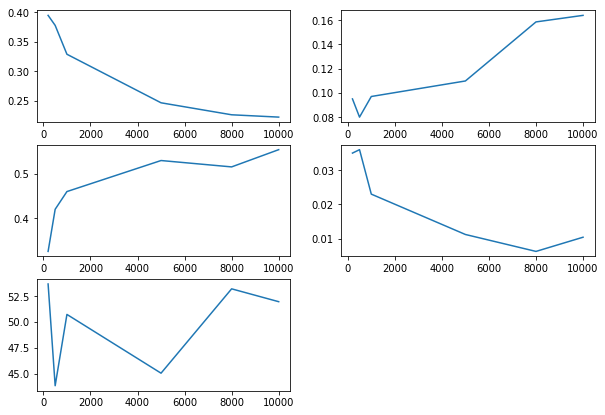

In [55]:
TRAINING_SIZES = [200, 500, 1000, 5000, 8000, 10000]

svm_accuracy_validation = []
svm_accuracy_test = []

forest_accuracy_validation = []
forest_accuracy_test = []

mlp_accuracy_test = []

for size in TRAINING_SIZES:
    
    score = train_and_validate(size)
    
    svm_score_test = score['SVM']['Test']
    svm_accuracy_test.append(svm_score_test)
    
    svm_score_validation = score['SVM']['Validation']
    svm_accuracy_validation.append(svm_score_validation)
    
    forest_score_test = score['Forest']['Test']
    forest_accuracy_test.append(forest_score_test)
    
    forest_score_validation = score['Forest']['Validation']
    forest_accuracy_validation.append(forest_score_validation)
    
    mlp_score = optimize(NUM_ITERATIONS=100, NUM_SAMPLES=5000)
    mlp_accuracy_test.append(mlp_score)
    
    
fig = plt.figure(figsize=(10, 7))

plt.subplot(3, 2, 1)
plt.plot(TRAINING_SIZES, svm_accuracy_test)

plt.subplot(3, 2, 2)
plt.plot(TRAINING_SIZES, svm_accuracy_validation)

plt.subplot(3, 2, 3)
plt.plot(TRAINING_SIZES, forest_accuracy_test)

plt.subplot(3, 2, 4)
plt.plot(TRAINING_SIZES, forest_accuracy_validation)

plt.subplot(3, 2, 5)
plt.plot(TRAINING_SIZES, mlp_accuracy_test)
